
# 🌟 What is an Affine Transformation?

An **affine transformation** is a geometric transformation that **preserves straight lines and parallelism**.
So after the transformation:

* Lines stay lines ✏️➡️
* Parallel lines stay parallel ⇢ ⇢
* Shapes may move, rotate, scale, or shear

---

# 🧮 General Formula

$$
\mathbf{y} = A\mathbf{x} + \mathbf{b}
$$

Where:

* $\mathbf{x}$ = original point
* $\mathbf{y}$ = transformed point
* $A$ = linear transformation matrix
* $\mathbf{b}$ = translation vector

This means:

**Affine = Linear Transformation 🔄 + Translation ➡️**

---

# 🔧 Common Types of Affine Transformations

### 1️⃣ Translation 🚚

$$
\mathbf{y} = \mathbf{x} + \mathbf{b}
$$

### 2️⃣ Scaling 🔍

$$
A =
\begin{pmatrix}
s_x & 0 \\
0 & s_y
\end{pmatrix}
$$

### 3️⃣ Rotation 🔄

$$
A =
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}
$$

### 4️⃣ Shear ✂️

$$
A =
\begin{pmatrix}
1 & k \\
0 & 1
\end{pmatrix}
$$

### 5️⃣ Reflection 🔁

$$
A =
\begin{pmatrix}
-1 & 0 \\
0 & 1
\end{pmatrix}
$$

---

# ✨ Why They Matter

Affine transformations are used in:

* Computer graphics 🎨
* Robotics 🤖
* Geometry 📐
* Machine learning 📊

They preserve the *structure* of objects while allowing flexible geometric changes.


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

## Functions

In [2]:
def plot_function(X, Y, fn, linewidth=0, title=''):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)

    plt.show()
    

## Original Function

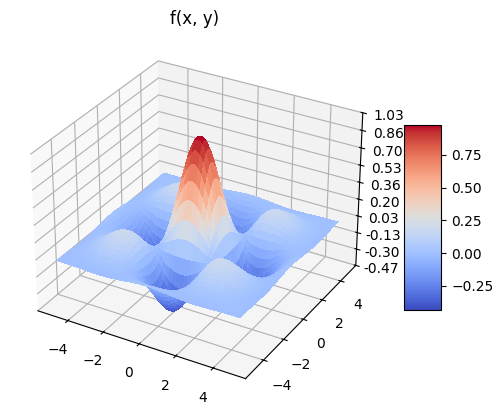

In [3]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
f = lambda x, y : np.exp(-(x**2 + y**2) / 10) * np.cos(x) * np.cos(y)

plot_function(X, Y, f, title='f(x, y)')

## Affine Transformation

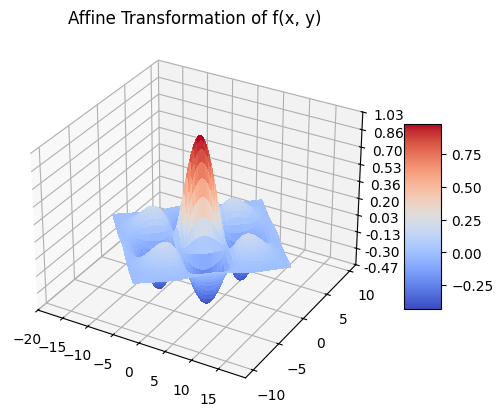

In [4]:
J = np.array([[2, -1.5], [1, 1]])
affine = lambda X, Y, J : np.matmul(J, np.stack((X, Y), axis=1))

Xm, Ym = np.meshgrid(X, Y)
X_j = affine(Xm, Ym, J)

# Create figure.
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(X_j[:, 0, :], X_j[:, 1, :], f(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Affine Transformation of f(x, y)')

plt.show()



# 🌟 **What Is the Jacobian?**

The **Jacobian** is a matrix of all *first-order partial derivatives* of a multivariable function.

It tells you **how a function stretches, rotates, or distorts space** locally — kind of like a “local linear approximation” of a nonlinear function 🔍✨.

---

# 🧮 **Formal Definition**

Suppose you have a function:

$$
\mathbf{f}(x_1, x_2, \dots, x_n)
=

\begin{pmatrix}
f_1(x_1,\dots,x_n)\\
f_2(x_1,\dots,x_n)\\
\vdots\\
f_m(x_1,\dots,x_n)
\end{pmatrix}
$$

The **Jacobian matrix** is:

$$
J_{\mathbf{f}} =
\begin{pmatrix}
\dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_1}{\partial x_2} & \cdots & \dfrac{\partial f_1}{\partial x_n} \\
\dfrac{\partial f_2}{\partial x_1} & \dfrac{\partial f_2}{\partial x_2} & \cdots & \dfrac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial f_m}{\partial x_1} & \dfrac{\partial f_m}{\partial x_2} & \cdots & \dfrac{\partial f_m}{\partial x_n}
\end{pmatrix}
$$

It’s basically:
👉 “How each output changes with respect to each input.”

---

# 🔍 **Jacobian Determinant (Special Case: n = m)**

If the function maps from $\mathbb{R}^n$ to $\mathbb{R}^n$, you can compute the **Jacobian determinant**:

$$$$
\det(J_{\mathbf{f}})
$$$$

This value tells you how *areas* (in 2D), *volumes* (in 3D), or *n-dimensional volume* get stretched.

* If $\det > 0$ → orientation preserved 👍
* If $\det < 0$ → orientation flipped 🔁
* If $\det = 0$ → transformation collapses space (not invertible) ❌

---

# 🎨 **Intuition**

Imagine a tiny square or cube 📦 around a point.

After applying the function, this tiny region becomes a distorted shape.
The **Jacobian** tells you:

* how much it stretches 📈
* how much it shrinks 📉
* how it rotates 🔄
* whether it flips 🔁

Locally, the function behaves *almost like a linear transformation*, and the Jacobian is exactly that linear approximation!

---

# ⭐ Summary

The Jacobian:

* is a matrix of partial derivatives 📘
* measures local stretching, shrinking, and rotation 🔄
* acts like the “best linear approximation” of a function near a point
* its determinant tells you the *change in volume* under the transformation


For the following function $ F(x, y) $:

$$
F(x, y) = \left[ \begin{array}{c} P(x, y) \\
                                  Q(x, y) \end{array} \right]
        = \left[ \begin{array}{c} x + \sin(y) \\
                                  y + \sin(x) \end{array} \right]
$$

The corresponding Jacobian is:

$$
J F(x, y) = \left[ \begin{array}{cc} 
                   1 + \sin(y) & x + \cos(y) \\
                   1 + \sin(y) & y + \cos(x) \end{array} \right]
$$

In [5]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)

Xm, Ym = np.meshgrid(X, Y)
f = lambda Xm, Ym : (Xm + np.sin(Ym), Ym + np.sin(Xm))
Xms, Yms = f(Xm, Ym)

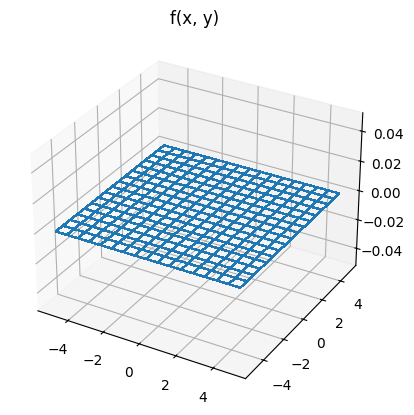

In [6]:
# Create figure.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(Xm, Ym, np.zeros(Xm.shape),
                         cmap=cm.coolwarm, linewidth=1, antialiased=False,
                         rstride=25, cstride=25)
plt.title('f(x, y)')
plt.show()

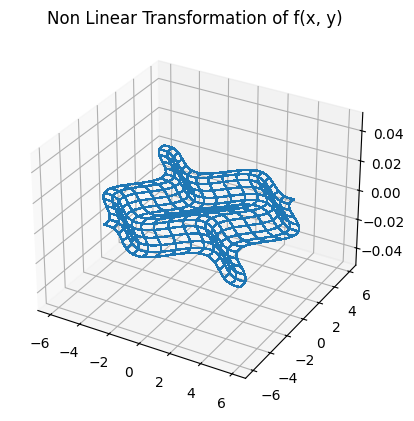

In [7]:
# Create figure.
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_wireframe(Xms, Yms, np.zeros(Xm.shape), 
                         cmap=cm.coolwarm, linewidth=1, antialiased=False,
                         rstride=25, cstride=25)
plt.title('Non Linear Transformation of f(x, y)')
plt.show()

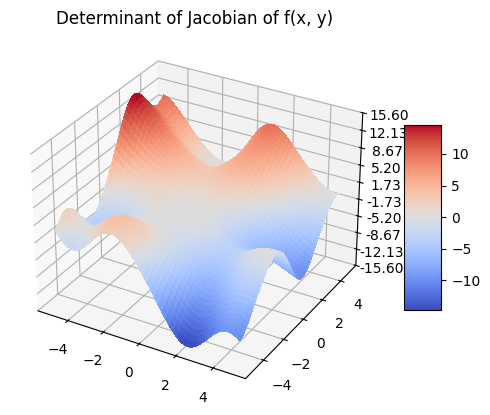

In [8]:
detJ = lambda X, Y : (1 + np.sin(X)) * (Y + np.cos(X)) - (1 + np.sin(Y)) * (X + np.cos(Y))
detJ = np.vectorize(detJ)

# Create figure.
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(Xm, Ym, detJ(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Determinant of Jacobian of f(x, y)')

plt.show()
